In [2]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [54]:
#Importing data
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
data = pd.read_csv(url, sep=',')

In [19]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [20]:
#Cleaning Data
print(data['education'].unique())

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


In [22]:
data['education'] = np.where(data['education']=='basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='basic.9y', 'Basic', data['education'])
print(data['education'].unique())

['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


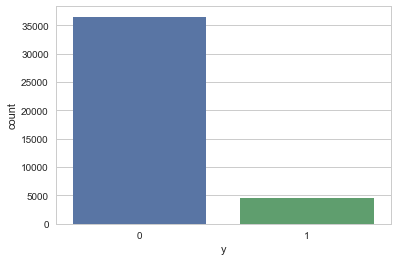

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [24]:
#Visualisation (Searching for trends by visualising the data)
sns.countplot(x='y', data = data)
plt.show()
plt.savefig("Outcome_count")
data.groupby('y').mean()

In [25]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [26]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [27]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


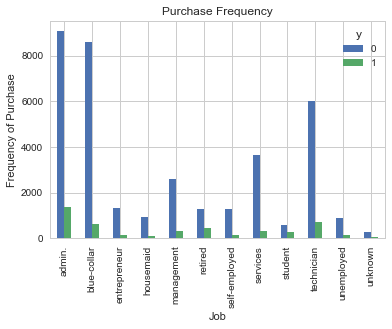

In [30]:
#Job Vs Purchase Frequency
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_job')
plt.show()
#Shows that the type of Job can be a useful predictor

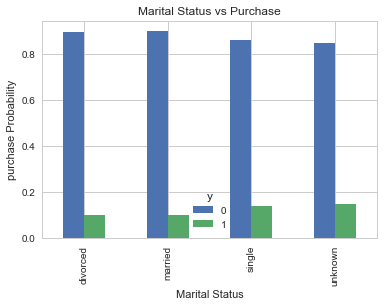

In [42]:
#Marital status Vs Purchase probability
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('purchase Probability')
plt.savefig('mariral_vs_pur_stack')
plt.show()
#Shows that the marital status can be a useful predictor

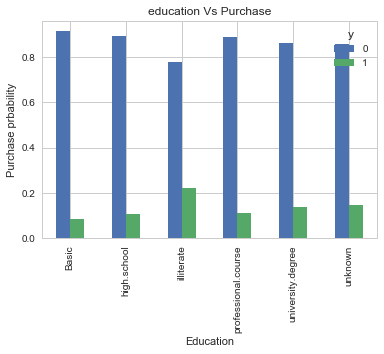

In [43]:
#Education Vs Purchase probability
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar')
plt.title('education Vs Purchase')
plt.xlabel('Education')
plt.ylabel('Purchase prbability')
plt.savefig('education_vs_pur_stack')
plt.show()
#Shows that the education can be a useful predictor

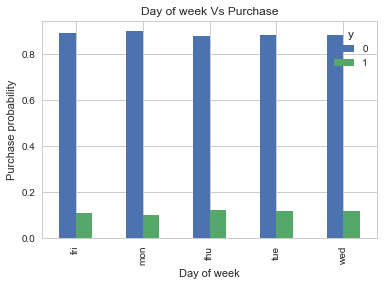

In [44]:
#Day of the week Vs Purchase probability
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1), axis = 0).plot(kind = 'bar')
plt.title('Day of week Vs Purchase')
plt.xlabel('Day of week')
plt.ylabel('Purchase probability')
plt.savefig('day_vs_pur')
plt.show()
#Shows that the day of the week is NOT a good predictor

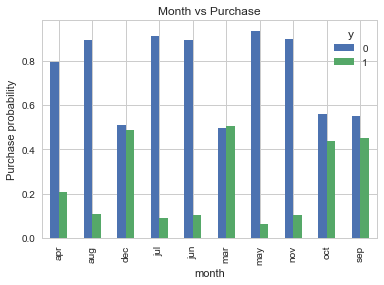

In [48]:
#Month Vs Purchase probability
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1), axis=0).plot(kind = 'bar')
plt.title('Month vs Purchase')
plt.xlabel('month')
plt.ylabel('Purchase probability')
plt.savefig('month_vs_pur')
plt.show()
#Shows that the month can be a useful predictor

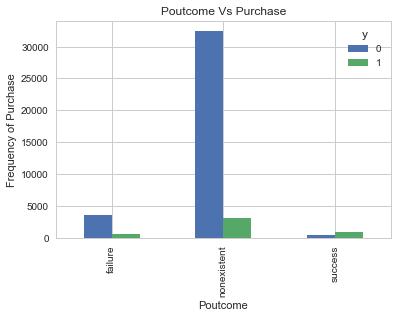

In [49]:
#Poutcome Vs Purchase frequency
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Poutcome Vs Purchase')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('poutcome_vs_pur')
plt.show()

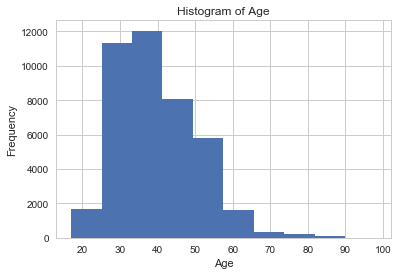

In [52]:
#Histogram of Age Vs Purchase Frequency
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Hist_age')
plt.show()

In [55]:
#Categorising all the non_numeric variables
variables = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in variables :
    var_list = 'var'+'_'+var
    var_list = pd.get_dummies(data[var], prefix = var)
    Data = data.join(var_list)
    data = Data
    
variables = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in variables]

data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [56]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [57]:
from sklearn import datasets
from sklearn.feature_selection import RFE

In [58]:
#Eliminating the features of less importance i.e, the features which have a less impact on the dependent variable.
#It is done by using RFE(Recursive feature elimination). The ranking returns 1 for the best performing features. 
logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False  True False False  True
 False False False  True False False  True False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False  True  True  True  True
 False False  True  True  True  True False False  True False False False
  True  True  True]
[39 36 18 44  1 20 23 21  1 29 14  1 22 42 43  1 35  2  1 26 30 41  6  7  8
 45 12 32  4 13 40 17 25 24  1  5 46 19 31 37 27 34 33 10  1  1  1  1  9 16
  1  1  1  1 15 11  1 38 28  3  1  1  1]


In [63]:
#Making a dataset of only the best performing features
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
x=data_final[cols]
y=data_final['y']

In [64]:
print(x.head())
print(y.head())

   previous  euribor3m  job_blue-collar  job_retired  job_services  \
0         0      4.963                1            0             0   
1         0      4.021                0            0             0   
2         2      0.729                0            0             0   
3         0      1.405                0            0             1   
4         1      0.869                0            1             0   

   job_student  default_no  month_aug  month_dec  month_jul  month_nov  \
0            0           0          1          0          0          0   
1            0           1          0          0          0          1   
2            0           1          0          0          0          0   
3            0           1          0          0          0          0   
4            0           1          1          0          0          0   

   month_oct  month_sep  day_of_week_fri  day_of_week_wed  poutcome_failure  \
0          0          0                0               

In [65]:
#Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

D:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.1844
Time:                        19:26:26   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

In [70]:
#Fitting the Logistic Regression model by spliting them into traning data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Score:' ,logreg.score(x_test, y_test ))
#Gets a score of 90.03%

Score: 0.900380351218


In [71]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#It shows that 10872 + 254 predictions were accurate.

[[10872   109]
 [ 1122   254]]
